In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Auto_Mobile_Sales.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
df.describe().round(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000,2747.000,2747.000,2747.000,2747.000,2747.000,2747.000
mean,10259.762,35.103,101.099,6.491,3553.048,1757.086,100.692
std,91.878,9.762,42.043,4.231,1838.954,819.281,40.115
min,10100.000,6.000,26.880,1.000,482.130,42.000,33.000
25%,10181.000,27.000,68.745,3.000,2204.350,1077.000,68.000
50%,10264.000,35.000,95.550,6.000,3184.800,1761.000,99.000
75%,10334.500,43.000,127.100,9.000,4503.095,2436.500,124.000
max,10425.000,97.000,252.870,18.000,14082.800,3562.000,214.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
print(df['CONTACTFIRSTNAME'].nunique())
print(df['CONTACTLASTNAME'].nunique())

72
76


In [6]:
print(df['CONTACTFIRSTNAME'].duplicated().sum())
print(df['CONTACTLASTNAME'].duplicated().sum())

2675
2671


In [7]:
df = df.drop(['PHONE', 'POSTALCODE', 'CONTACTLASTNAME'], axis=1)

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,France,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,USA,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,9408 Furth Circle,Burlingame,USA,Juri,Medium


In [9]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
ADDRESSLINE1              89
CITY                      71
COUNTRY                   19
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [10]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
ADDRESSLINE1            0
CITY                    0
COUNTRY                 0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [11]:
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        num_col.append(i)
    else:
        cat_col.append(i)

In [12]:
print(num_col)
print('---------------')
print(cat_col)

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']
---------------
['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'COUNTRY', 'CONTACTFIRSTNAME', 'DEALSIZE']


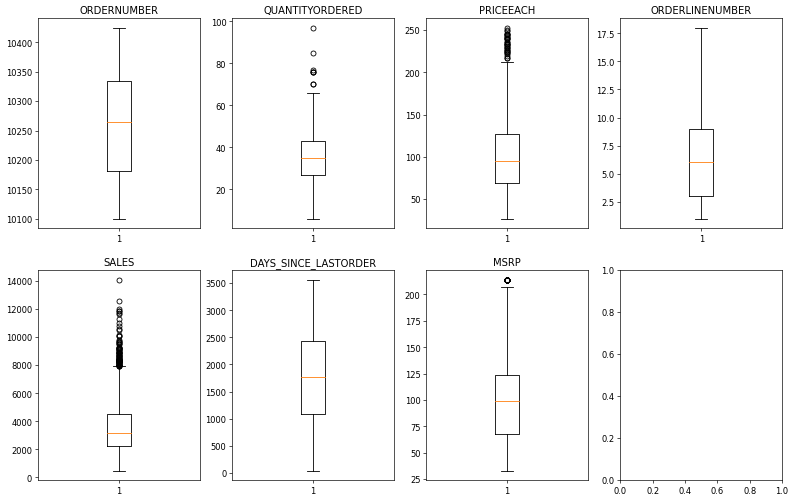

In [13]:
f,ax = plt.subplots(2,4, figsize=(16,10), dpi=60)
index = 0
try:
    for i in range(2):
        for j in range(4):
            ax[i,j].boxplot(df[num_col[index]])
            ax[i,j].set_title(num_col[index])
            index+=1
except:
    pass
plt.show()

In [14]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

In [16]:
print('======> 25% Data <======')
print(Q1)
print('======> 75% Data <======')
print(Q3)
print('======> 50% Data <======')
print(IQR)

======> 25% Data <======
ORDERNUMBER             10181.000
QUANTITYORDERED            27.000
PRICEEACH                  68.745
ORDERLINENUMBER             3.000
SALES                    2204.350
DAYS_SINCE_LASTORDER     1077.000
MSRP                       68.000
Name: 0.25, dtype: float64
======> 75% Data <======
ORDERNUMBER             10334.500
QUANTITYORDERED            43.000
PRICEEACH                 127.100
ORDERLINENUMBER             9.000
SALES                    4503.095
DAYS_SINCE_LASTORDER     2436.500
MSRP                      124.000
Name: 0.75, dtype: float64
======> 50% Data <======
ORDERNUMBER              153.500
QUANTITYORDERED           16.000
PRICEEACH                 58.355
ORDERLINENUMBER            6.000
SALES                   2298.745
DAYS_SINCE_LASTORDER    1359.500
MSRP                      56.000
dtype: float64


In [17]:
print('-----> Upper Limit <-----')
print(UL)
print('-----> Lower Limit <-----')
print(LL)

-----> Upper Limit <-----
ORDERNUMBER             10564.7500
QUANTITYORDERED            67.0000
PRICEEACH                 214.6325
ORDERLINENUMBER            18.0000
SALES                    7951.2125
DAYS_SINCE_LASTORDER     4475.7500
MSRP                      208.0000
dtype: float64
-----> Lower Limit <-----
ORDERNUMBER             9950.7500
QUANTITYORDERED            3.0000
PRICEEACH                -18.7875
ORDERLINENUMBER           -6.0000
SALES                  -1243.7675
DAYS_SINCE_LASTORDER    -962.2500
MSRP                     -16.0000
dtype: float64


In [18]:
(df>UL).sum() | (df<LL).sum()

ADDRESSLINE1             0
CITY                     0
CONTACTFIRSTNAME         0
COUNTRY                  0
CUSTOMERNAME             0
DAYS_SINCE_LASTORDER     0
DEALSIZE                 0
MSRP                    26
ORDERDATE                0
ORDERLINENUMBER          0
ORDERNUMBER              0
PRICEEACH               33
PRODUCTCODE              0
PRODUCTLINE              0
QUANTITYORDERED          8
SALES                   79
STATUS                   0
dtype: int64

In [19]:
def outlier(x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    df[x].clip(ll,ul, inplace=True)

In [20]:
for i in num_col:
    outlier(i)

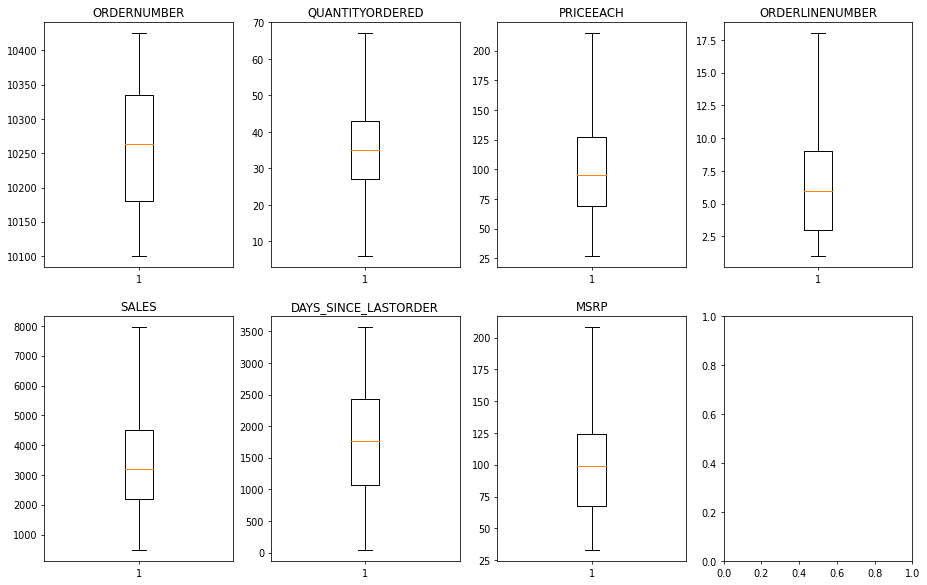

In [21]:
f,ax = plt.subplots(2,4, figsize=(16,10), dpi=70)
index_1 = 0
try:
    for i in range(2):
        for j in range(4):
            ax[i,j].boxplot(df[num_col[index_1]])
            ax[i,j].set_title(num_col[index_1])
            index_1+=1
except:
    pass
plt.show()

In [22]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,France,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,USA,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,9408 Furth Circle,Burlingame,USA,Juri,Medium


In [23]:
df[['ORDERDATE','CONTACTFIRSTNAME','QUANTITYORDERED','SALES']].groupby(['CONTACTFIRSTNAME','ORDERDATE']).agg('sum')

QUANTITYORDERED       SALES
CONTACTFIRSTNAME ORDERDATE                              
Adrian           16/07/2018              266  28392.0125
                 17/12/2019              429  37905.1500
                 19/07/2019              374  41297.1400
                 29/05/2020              532  43971.4300
Akiko            15/06/2019              200  25928.7500
...                                      ...         ...
Wing C           07/01/2020               96  11021.3000
                 10/08/2018              524  45738.3900
                 14/11/2018              520  52191.4400
Yoshi            05/12/2018              355  37548.5325
                 22/10/2019              348  36576.7100

[297 rows x 2 columns]

In [24]:
df[['ORDERDATE','CONTACTFIRSTNAME','QUANTITYORDERED']].groupby(['CONTACTFIRSTNAME','ORDERDATE']).agg(['sum','count'])

QUANTITYORDERED      
                                        sum count
CONTACTFIRSTNAME ORDERDATE                       
Adrian           16/07/2018             266     8
                 17/12/2019             429    14
                 19/07/2019             374    11
                 29/05/2020             532    13
Akiko            15/06/2019             200     6
...                                     ...   ...
Wing C           07/01/2020              96     3
                 10/08/2018             524    16
                 14/11/2018             520    16
Yoshi            05/12/2018             355    11
                 22/10/2019             348    11

[297 rows x 2 columns]

In [25]:
df[['PRODUCTLINE','CONTACTFIRSTNAME','QUANTITYORDERED']].groupby(['CONTACTFIRSTNAME','PRODUCTLINE']).agg('sum')

QUANTITYORDERED
CONTACTFIRSTNAME PRODUCTLINE                      
Adrian           Classic Cars                  387
                 Motorcycles                    46
                 Planes                        243
                 Ships                          24
                 Trucks and Buses              162
...                                            ...
Wing C           Trains                         69
                 Vintage Cars                  232
Yoshi            Classic Cars                  175
                 Trucks and Buses              351
                 Vintage Cars                  177

[338 rows x 1 columns]

In [26]:
df[['PRODUCTLINE','QUANTITYORDERED']].groupby(['PRODUCTLINE']).agg('sum')

,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,33322
Motorcycles,11080
Planes,10608
Ships,7989
Trains,2712
Trucks and Buses,10576
Vintage Cars,20050


In [27]:
df['PRODUCTLINE'].value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [28]:
df['COUNTRY'].value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

In [29]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [30]:
print('STATUS Unique',df['STATUS'].nunique())
print('PRODUCTLINE Unique',df['PRODUCTLINE'].nunique())
print('CUSTOMERNAME Unique',df['CUSTOMERNAME'].nunique())
print('ADDRESSLINE1 Unique',df['ADDRESSLINE1'].nunique())
print('CITY Unique',df['CITY'].nunique())
print('COUNTRY Unique',df['COUNTRY'].nunique())
print('CONTACTFIRSTNAME Unique',df['CONTACTFIRSTNAME'].nunique())
print('DEALSIZE Unique',df['DEALSIZE'].nunique())
print("ORDERDATE Unique", df['ORDERDATE'].nunique())

STATUS Unique 6
PRODUCTLINE Unique 7
CUSTOMERNAME Unique 89
ADDRESSLINE1 Unique 89
CITY Unique 71
COUNTRY Unique 19
CONTACTFIRSTNAME Unique 72
DEALSIZE Unique 3
ORDERDATE Unique 246


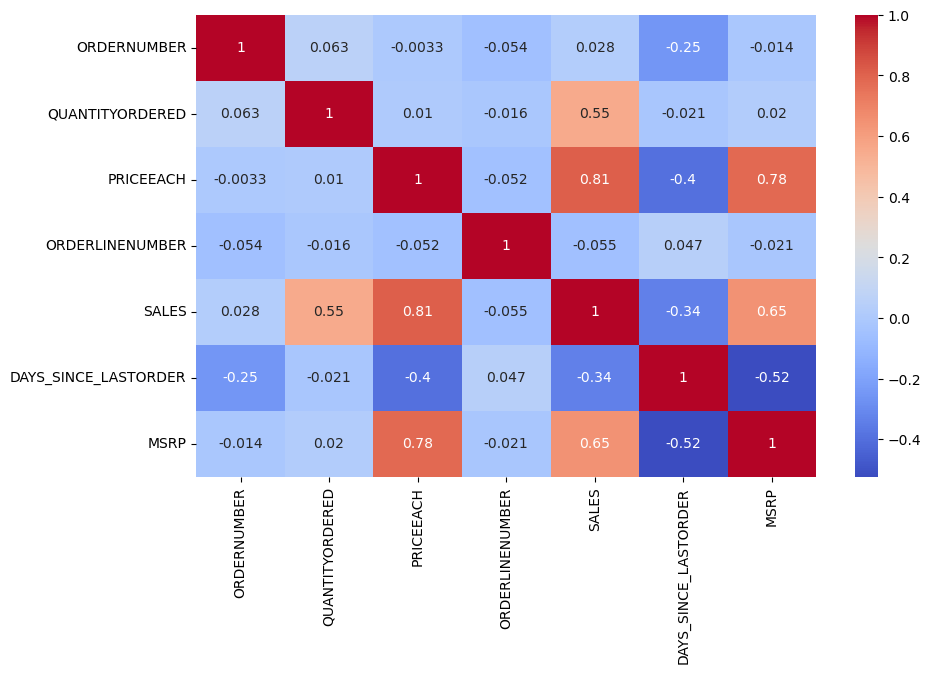

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,fmt='0.2g', cmap='coolwarm')
plt.show()

In [32]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,France,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,USA,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,9408 Furth Circle,Burlingame,USA,Juri,Medium


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
def encode(a):
    le.fit(a)
    print(a.name, le.classes_)
    return le.transform(a)

In [35]:
col = ['STATUS','PRODUCTLINE','PRODUCTCODE','CUSTOMERNAME','ADDRESSLINE1','CITY','COUNTRY','CONTACTFIRSTNAME','DEALSIZE']
for i in col:
    df[i] = le.fit_transform(df[i])

In [36]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,5,1,95,0,44,54,41,18,36,2
1,10121,34,81.35,5,2765.90,07/05/2018,757,5,1,95,0,63,39,55,6,54,2
2,10134,41,94.74,2,3884.34,01/07/2018,703,5,1,95,0,45,21,51,6,11,1
3,10145,45,83.26,6,3746.70,25/08/2018,649,5,1,95,0,82,51,52,18,31,1
4,10168,36,96.66,1,3479.76,28/10/2018,586,5,1,95,0,76,55,12,18,32,1


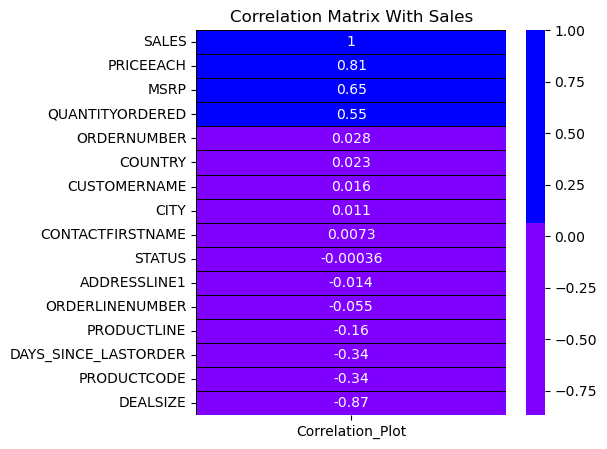

In [37]:
colors = ['#7F00FF', '#0000FF']
corr = df.corrwith(df['SALES']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation_Plot']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix With Sales")
plt.show()

In [38]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [39]:
df = df.drop('ORDERDATE', axis=1)

In [40]:
x = df.drop('SALES', axis=1)
y = df['SALES']

In [41]:
column = ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'COUNTRY',
       'CONTACTFIRSTNAME', 'DEALSIZE']

In [42]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [43]:
x = SS.fit_transform(x)

In [44]:
x = pd.DataFrame(x, columns=column)
x.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,-1.662968,-0.526934,-0.124957,-1.061778,-1.134233,0.250977,-0.623972,-0.141045,-1.716105,-0.034320,0.275627,0.223742,0.994155,-0.029145,1.016683
1,-1.510563,-0.111198,-0.472209,-0.352520,-1.220910,0.250977,-0.623972,-0.141045,-1.716105,0.757229,-0.338077,0.968089,-0.950154,0.817065,1.016683
2,-1.369045,0.616339,-0.148188,-1.061778,-1.286834,0.250977,-0.623972,-0.141045,-1.716105,0.007340,-1.074522,0.755419,-0.950154,-1.204436,-0.672868
3,-1.249299,1.032075,-0.425989,-0.116101,-1.352757,0.250977,-0.623972,-0.141045,-1.716105,1.548778,0.152886,0.808586,0.994155,-0.264203,-0.672868
4,-0.998920,0.096670,-0.101727,-1.298197,-1.429668,0.250977,-0.623972,-0.141045,-1.716105,1.298815,0.316540,-1.318121,0.994155,-0.217191,-0.672868


In [45]:
print(x.shape)
print(y.shape)

(2747, 15)
(2747,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

In [48]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
print(y_pred_train)
print('<<<<<<<<>>>>>>>')
print(y_pred_test)

[1635.21620533 2659.84754275 4371.49022843 ... 4437.83343071 4684.04893956
 3791.39353612]
<<<<<<<<>>>>>>>
[ 1.67582039e+03  2.22500105e+03  3.16869652e+03  2.04934023e+03
  3.44347298e+03  2.71264473e+03  4.75926946e+03  4.64186043e+03
  4.66100029e+03  3.16345809e+03  5.18550925e+03  3.55698639e+03
  3.26922115e+03  3.58792464e+03  1.91355960e+03  2.69891546e+03
  3.58011724e+03  5.01536144e+03  4.59377780e+03  3.88786986e+03
  3.94984562e+03  3.61901608e+03  2.80812671e+03  4.05393379e+03
  3.47721263e+03  6.46627533e+02  3.16289043e+03  3.36858192e+03
  5.66202570e+03  2.20012436e+03  9.28406334e+02  8.04088312e+03
  4.74378725e+03  1.39754125e+03  3.49755495e+03  2.37953675e+03
  4.79476738e+03  2.17627020e+03  3.89317690e+03  2.92618554e+03
  1.02787871e+03  1.55777892e+03  1.66556489e+03  2.19575860e+03
  6.01656490e+03  5.15789763e+03  5.67283634e+03  1.39379689e+03
  2.14902708e+03  1.63816852e+03  2.87698751e+03  3.95406881e+03
  3.66625356e+03  1.66902354e+03  5.68129859e+03

In [52]:
print(LR.intercept_)
print(LR.coef_)

3513.4266788740056
[-9.63531784e+00  8.71310527e+02  1.27233343e+03 -5.51647880e-01
 -2.01618133e+01 -5.83951684e+00  9.90027928e+00  1.08483398e+01
  1.58745849e+01 -1.10676373e+01 -6.82244705e+00 -1.63738653e+01
 -1.46490758e+01  5.86581745e+00 -1.55077877e+02]


In [53]:
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.9595014265551229
0.9595075434148936


In [54]:
print(mean_squared_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

121879.13783680653
349.11192737688947


In [55]:
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))

120682.92266310591
347.39447701871416


In [56]:
R2 = r2_score(y_test,y_pred_test)
n=x_test.shape[0]
k=x_test.shape[1]

adj_r2=1-((1-R2)*(n-1)/(n-k-1))
print('Adjusted R2 -',adj_r2)

Adjusted R2 - 0.9587505259350078


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def VIF(k):
    vif = pd.DataFrame()
    vif['features'] = k.columns
    vif['vif_value'] = [variance_inflation_factor(k.values, i) for i in range(k.shape[1])]
    return vif

In [58]:
VIF(x)

,features,vif_value
0,ORDERNUMBER,27.388613
1,QUANTITYORDERED,1.877882
2,PRICEEACH,4.598859
3,ORDERLINENUMBER,1.020070
4,DAYS_SINCE_LASTORDER,368.168989
5,STATUS,1.066915
6,PRODUCTLINE,1.099907
7,MSRP,3.171744
8,PRODUCTCODE,345.403300
9,CUSTOMERNAME,1.067373


In [59]:
x.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,1.000000,0.062640,-0.003321,-0.054300,-0.251476,-0.158880,-0.008366,-0.013858,0.016371,0.082856,0.046383,0.049064,-0.021261,-0.046039,-0.017148
QUANTITYORDERED,0.062640,1.000000,0.010018,-0.016372,-0.021122,-0.035732,-0.008955,0.019799,-0.006620,0.030896,-0.007174,0.005307,0.056099,-0.001211,-0.475887
PRICEEACH,-0.003321,0.010018,1.000000,-0.051670,-0.397263,0.026201,-0.198000,0.781075,-0.412557,-0.001702,-0.006266,0.016127,-0.002478,0.014851,-0.726163
ORDERLINENUMBER,-0.054300,-0.016372,-0.051670,1.000000,0.046615,-0.015701,-0.000564,-0.020874,0.035220,0.020103,0.060216,0.031376,0.020501,0.051088,0.056093
DAYS_SINCE_LASTORDER,-0.251476,-0.021122,-0.397263,0.046615,1.000000,0.008875,0.122536,-0.524044,0.962190,-0.009703,0.007426,-0.024472,0.020263,-0.034679,0.291508
STATUS,-0.158880,-0.035732,0.026201,-0.015701,0.008875,1.000000,-0.034834,0.021484,-0.036553,-0.086613,-0.103476,0.111296,-0.044729,0.101859,0.016248
PRODUCTLINE,-0.008366,-0.008955,-0.198000,-0.000564,0.122536,-0.034834,1.000000,-0.278799,0.127327,-0.056960,0.031639,0.017671,-0.003372,0.028581,0.135022
MSRP,-0.013858,0.019799,0.781075,-0.020874,-0.524044,0.021484,-0.278799,1.000000,-0.546225,0.002985,-0.005780,0.019851,-0.003194,0.019675,-0.576482
PRODUCTCODE,0.016371,-0.006620,-0.412557,0.035220,0.962190,-0.036553,0.127327,-0.546225,1.000000,0.014720,0.019289,-0.012702,0.017903,-0.045236,0.299348
CUSTOMERNAME,0.082856,0.030896,-0.001702,0.020103,-0.009703,-0.086613,-0.056960,0.002985,0.014720,1.000000,0.051352,-0.129405,0.173873,0.021224,-0.023887


In [60]:
x.drop(['ORDERNUMBER','DAYS_SINCE_LASTORDER','PRODUCTCODE'],axis=1, inplace=True)

In [61]:
x.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,-0.526934,-0.124957,-1.061778,0.250977,-0.623972,-0.141045,-0.034320,0.275627,0.223742,0.994155,-0.029145,1.016683
1,-0.111198,-0.472209,-0.352520,0.250977,-0.623972,-0.141045,0.757229,-0.338077,0.968089,-0.950154,0.817065,1.016683
2,0.616339,-0.148188,-1.061778,0.250977,-0.623972,-0.141045,0.007340,-1.074522,0.755419,-0.950154,-1.204436,-0.672868
3,1.032075,-0.425989,-0.116101,0.250977,-0.623972,-0.141045,1.548778,0.152886,0.808586,0.994155,-0.264203,-0.672868
4,0.096670,-0.101727,-1.298197,0.250977,-0.623972,-0.141045,1.298815,0.316540,-1.318121,0.994155,-0.217191,-0.672868


In [62]:
VIF(x)

,features,vif_value
0,QUANTITYORDERED,1.871113
1,PRICEEACH,4.592485
2,ORDERLINENUMBER,1.014047
3,STATUS,1.039887
4,PRODUCTLINE,1.095156
5,MSRP,2.680544
6,CUSTOMERNAME,1.059028
7,ADDRESSLINE1,1.122403
8,CITY,1.158223
9,COUNTRY,1.127747


In [63]:
print(x.shape)
print(y.shape)

(2747, 12)
(2747,)


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

In [65]:
LR.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

In [67]:
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.9583033658562432
0.9598470654390231


In [68]:
R2 = r2_score(y_test,y_pred_test)
n=x_test.shape[0]
k=x_test.shape[1]

adj_r2=1-((1-R2)*(n-1)/(n-k-1))
print(adj_r2)

0.9576871594403256


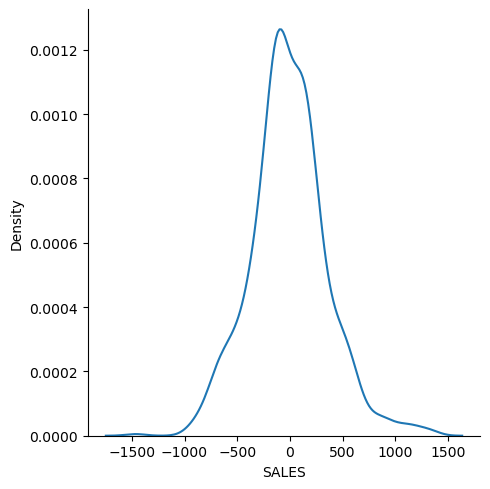

In [69]:
sns.displot(y_pred_test-y_test, kind='kde')

In [70]:
import statsmodels.api as sm

In [71]:
result = sm.OLS(y, x).fit()

In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  SALES   R-squared (uncentered):                   0.187
Model:                            OLS   Adj. R-squared (uncentered):              0.183
Method:                 Least Squares   F-statistic:                              52.31
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                   1.77e-113
Time:                        22:57:59   Log-Likelihood:                         -26343.
No. Observations:                2747   AIC:                                  5.271e+04
Df Residuals:                    2735   BIC:                                  5.278e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
QUANTITYORDERED    863.1321     92.478      9.333      0.000     681.798    1044.467
PRICEEACH         1274.2050    144.882      8.795      0.000     990.116    1558.294
ORDERLINENUMBER     -5.4628     68.080     -0.080      0.936    -138.956     128.030
STATUS              -0.9475     68.942     -0.014      0.989    -136.131     134.236
PRODUCTLINE          0.3098     70.750      0.004      0.997    -138.420     139.039
MSRP                10.6485    110.688      0.096      0.923    -206.393     227.690
CUSTOMERNAME         1.0373     69.574      0.015      0.988    -135.385     137.459
ADDRESSLINE1       -10.5362     71.625     -0.147      0.883    -150.981     129.908
CITY               -11.0902     72.759     -0.152      0.879    -153.758     131.578
COUNTRY            -11.8410     71.795     -0.165      0.869    -152.619     128.938
CONTACTFIRSTNAME    -2.0598     71.689     -0.029      0.977    -142.629     138.510
DEALSIZE          -160.7544    134.671     -1.194      0.233    -424.821     103.312
==============================================================================
Omnibus:                      128.459   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.102
Skew:                          -0.395   Prob(JB):                     1.07e-45
Kurtosis:                       4.088   Cond. No.                         4.58
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold

In [74]:
LASO = Lasso(alpha=50, max_iter=100)
LASO.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100)

In [75]:
LASO.score(x_test, y_test)

0.9542767450393179

In [76]:
LASO.score(x_train, y_train)

0.9579172135762878

In [77]:
from sklearn.linear_model import Ridge

In [78]:
Ridge = Ridge(alpha=20, max_iter=50)
Ridge.fit(x_train, y_train)

Ridge(alpha=20, max_iter=50)

In [79]:
y_pred_train = Ridge.predict(x_train)
y_pred_test = Ridge.predict(x_test)

In [80]:
MSE = np.mean(y_pred_test - y_test)
print(MSE)
RMSE = np.mean((y_pred_test - y_test)**2)
print(RMSE)

-9.487708220364132
132043.51458291255


In [81]:
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.957655491754147
0.9595304859714822


In [82]:
R2 = r2_score(y_test, y_pred_test)
n = x_test.shape[0]
k = x_test.shape[1]
Adj_R2 = 1-(1-R2)*((n-1)/n-k-1)
print(Adj_R2)

1.5081854256268978


In [83]:
x = df.iloc[:,0]

In [84]:
y = df.iloc[:,0]

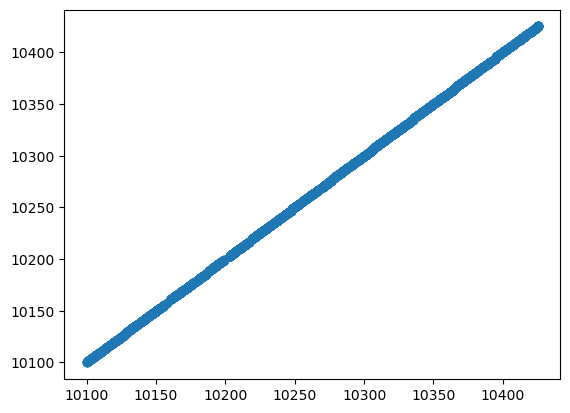

In [85]:
plt.scatter(x,y)
plt.show()